### Regression analysis:
#### It is a statical method used to examine the relationship between one dependent variable and one or more independent variable the goal of regression analysis is to understand  how the dependent variable change when one or more independent variable altered.

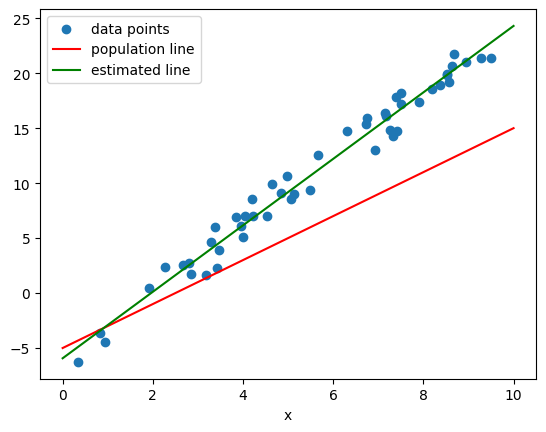

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.rand(50) * 4

x = x.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

y_pred = model.predict(x)


plt.scatter(x,y,label='data points')
plt.xlabel('x')


# line plot
x_line = np.linspace(0,10,100)
y_actual = 2 * x_line - 5
plt.plot(x_line,y_actual,color='red',label='population line')

y_estimate = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line,y_estimate,color='green',label='estimated line')

plt.legend()
plt.show()

### Advertising data set
####

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('advertising.csv')

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           8.13e-99
Time:                        07:34:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

### F-test for overal significant
- it is a statistical test used to determine whether a linear regression model is statistically significant.

[we use a test to see if the results from a linear regression model are reliable or if they happened just by chance.]
#### TSS (Total sum square)
  - . It is the sum of the squared differences between each observed value and the mean of the observed values.



  - y- is the mean of the observed values.
  - TSS tells us how much variability there is in the data without considering any model.




#### RSS (Residual sum square),
- It represents the difference between the observed values and the values predicted by the model



#### ESS (Explain sum square)
- It represents the difference between the predicted values and the mean of the observed values.


### Degree of freedom
- in linear regression degree of freedom represent the total number of data point minus 1 (n - 1)
-  the total degree of freedom in linear regression is divided into two component

- Degree of freedom for the model : it is equal to the number of independent variable (columns) in the model ( k )

- Degree of freedom of residual:
it is equal to the number of data points(n) minus the number of estimated parameters including the intercept ( k + 1 )

total degree of freedom = k + n - k - 1 = (n - 1)

### F-statistic & Prob(F-statistic)
#### it is a statical test used to determine wheither a regression model is good fit for the data. it check the independent variable together have a significant effect on the dependent variable
F=
Mean Square for Error (MSE)/
Mean Square for Regression (MSR)
​


- MSR (Mean Square for Regression): This is the average amount of variability explained by the regression model. It is calculated as the regression sum of squares (SSR) divided by the degrees of freedom for the model.

    - MSR = SSR / df model


- MSE (Mean Square for Error): This is the average amount of unexplained variability (error) in the model. It is calculated as the residual sum of squares (SSE) divided by the degrees of freedom for the error.

    - MSE = SSE / df error


Where:
SSR (Sum of Squares for Regression): The sum of the squared differences between the predicted values.

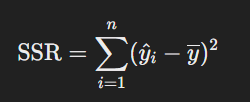





In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('advertising.csv')

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

f_stats = model.fvalue
p_value = model.f_pvalue

print(f"F-statistic: {f_stats}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The model is statistically significant.")
else:
    print("The model is not statistically significant.")

F-statistic: 605.3801307108599
P-value: 8.133735101448445e-99
The model is statistically significant.


### R-squared (godness of fit)
- it is also known as cofficient of determination it is a statical measure that represent how well the data fits a statistical model.it tell the proportion of the dependent variable that can be explained by the independent variables in the model

r2 = 1 - rss / tss

R² score: 0.9059
Adjusted R² score: 0.8951


<ipython-input-21-073f7286a66d>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resudal)


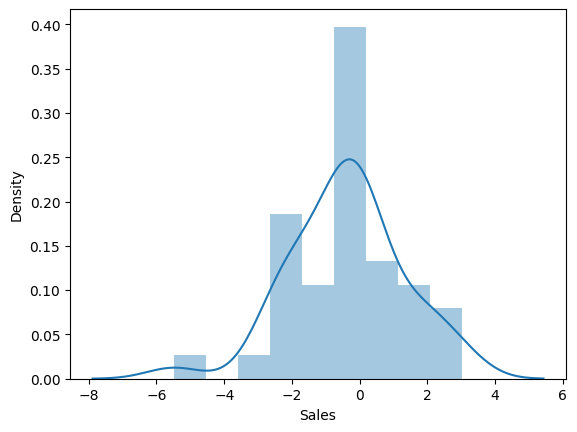

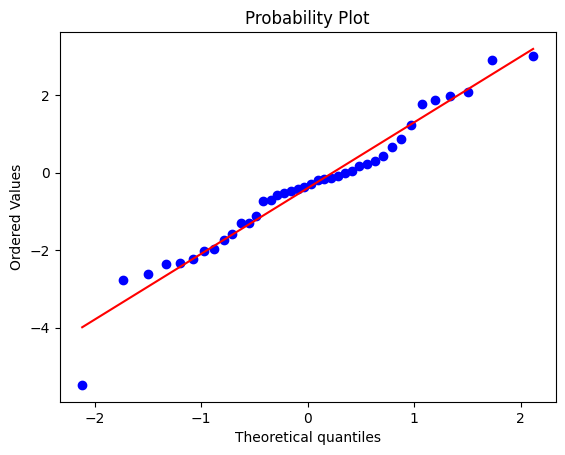

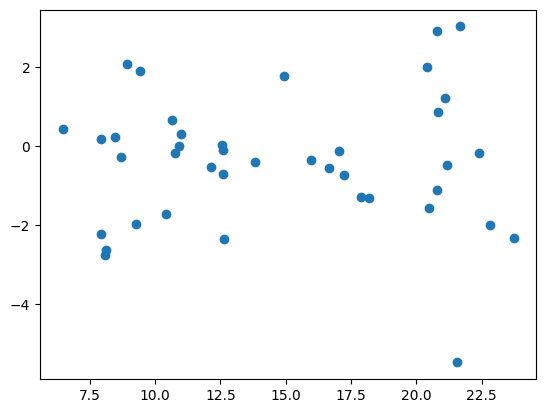

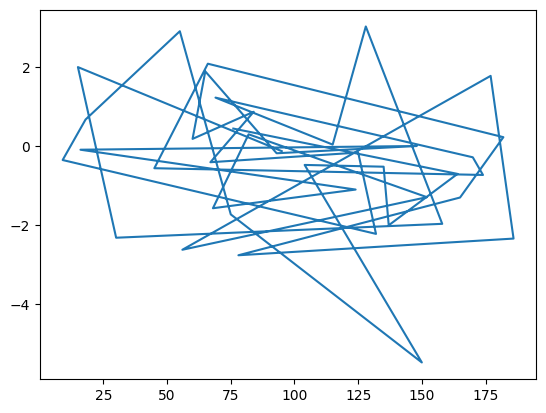

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict using the model
y_pred = model.predict(X_test)

# resudal
resudal = y_test - y_pred

# Step 5: Calculate R² score (Regular R-squared)
r2 = r2_score(y_test, y_pred)

# Step 6: Calculate Adjusted R² score
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features (predictors)

# Adjusted R² formula
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f"R² score: {r2:.4f}")
print(f"Adjusted R² score: {adj_r2:.4f}")

# sns displot for resudal
sns.distplot(resudal)
plt.show()

# qq plot

import scipy.stats as stats
stats.probplot(resudal,dist='norm',plot=plt)
plt.show()

# homoscedasticity
plt.scatter(y_pred,resudal)
plt.show()

plt.plot(resudal)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as ss
from sklearn.model_selection import train_test_split


# Step 1: Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(100) * 0.5  # Linear relationship with noise


X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2,random_state=42)

x_train_with_intercept = ss.add_constant(X_train)
x_test_with_intercept = ss.add_constant(X_test)


model = ss.OLS(y_train,x_train_with_intercept).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     188.2
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.38e-35
Time:                        13:18:03   Log-Likelihood:                -43.811
No. Observations:                  80   AIC:                             95.62
Df Residuals:                      76   BIC:                             105.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0425      0.151     -0.282      0.7

### T-statistic


In [18]:


# Add constant (intercept) to the model
x = sm.add_constant(x)

# Step 3: Fit the linear regression model
model = sm.OLS(y, x)
results = model.fit()

# Step 4: Get t-statistics and p-values for all columns
t_stats = results.tvalues
p_values = results.pvalues

# Step 5: Display t-statistics and p-values
print("T-statistics for each predictor:")
print(t_stats)
print("\nP-values for each predictor:")
print(p_values)
print('*'*50)

# Step 6: Interpret the results
# If p-value < 0.05, the predictor is statistically significant
for predictor, p_value in p_values.items():
    if p_value < 0.05:
        print(f"{predictor} is statistically significant.")
    else:
        print(f"{predictor} is not statistically significant.")


T-statistics for each predictor:
const        15.040997
TV           39.591524
Radio        12.603857
Newspaper     0.057991
dtype: float64

P-values for each predictor:
const        1.682677e-34
TV           1.892945e-95
Radio        4.602097e-27
Newspaper    9.538145e-01
dtype: float64
**************************************************
const is statistically significant.
TV is statistically significant.
Radio is statistically significant.
Newspaper is not statistically significant.


### Asumpation of linear regression
#### Linearity:
  - relation between dependent and independent variable must be like linear or sort of linear.
  - if the relation is not linear the model won't work well

#### independence of error :
  - The error made by the model when predicting the values should not be related to each other. one prediction error should not depend on another
  - if the error are related the model might give wrong result

#### Homoscedasticy :
  - the spread of the error should be the same across all value of the independent variable
  - if the error get bigger or smaller depending on the value the model might not be reliablle

#### Normality of errors :
  - The errors made by the model should follow a normal distribution
  - if the error not follow the normal distribution statistical test may not work properly.

#### Multicollinearity :
  - The independent variable should not be too strongly related to each other.
  - If predictors are too similar the model can get confused and may not give accurate results.

#### No outliers:
  - outlier are extreme value that are much different from the rest of the data. outlier can heavily influence the regression model and cause it to make poor prediction


### How to Check These Assumptions:
#### Linearity:
- Plot the data. If the relationship between the variables looks like a straight line (or close to it), then this assumption is likely satisfied.
#### Independence of Errors:
- Check if the errors (residuals) are randomly spread around 0 when you plot them.
#### Homoscedasticity:
- Check if the spread of the errors looks similar across all values of the predictors.
#### Normality of Errors:
-  Plot a histogram of the errors and see if they look like a bell curve (normal distribution).
#### Multicollinearity:
- Check if the predictors are highly correlated with each other. You can use tools like a correlation matrix to help.
#### Outliers:
- Look for data points that are far away from the rest of the data points. You can use scatter plots to spot them.
#### Measurement Error:
- Make sure your data is collected and measured correctly. This is often checked before the analysis by ensuring the data collection process is sound.

### VIF variance inflation factor

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# converting x to pandas dataframe
X_df = pd.DataFrame(x)



X_with_const = sm.add_constant(X_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the results
print(vif_data)




     Feature       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


<Axes: >

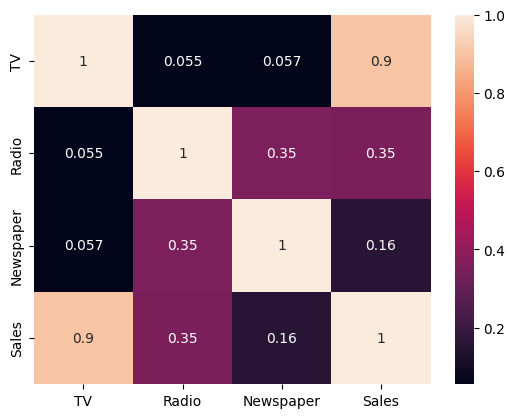

In [20]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [28]:
np.linalg.cond(df.iloc[:,:-1])

12.623136926075038

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.linalg.cond(df.iloc[:,:-1])

12.623136926075038